mean: 0.5047568648913463
median: 0.5109281807995126


(array([1.0017966 , 0.9717427 , 1.0017966 , 1.0017966 , 0.9116349 ,
        0.9717427 , 1.09195829, 1.07192236, 1.01181456, 0.98176067]),
 array([5.26055504e-04, 1.00346718e-01, 2.00167380e-01, 2.99988043e-01,
        3.99808705e-01, 4.99629367e-01, 5.99450030e-01, 6.99270692e-01,
        7.99091354e-01, 8.98912017e-01, 9.98732679e-01]),
 <BarContainer object of 10 artists>)

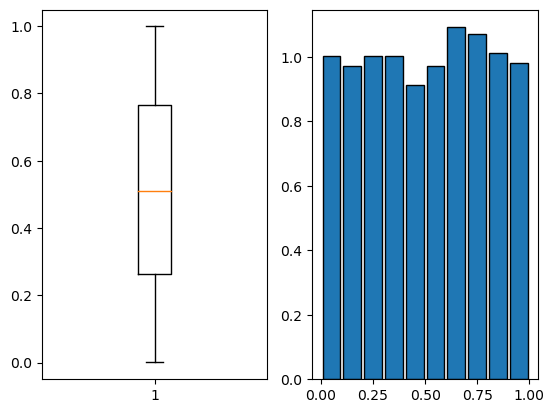

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap as bm

np.random.seed(911)
A = np.random.rand(1000)
print("mean:", np.mean(A))
print("median:", np.median(A))
plt.subplot(1,2,1) # boxplot
plt.boxplot(A) 
plt.subplot(1,2,2) # histogram
plt.hist(A, bins=10, rwidth=0.85, edgecolor = "k", density = 1.0)

               0
count  37.000000
mean   27.773789
std     0.768900
min    26.048300
25%    27.326700
50%    27.697700
75%    28.435600
max    29.287800


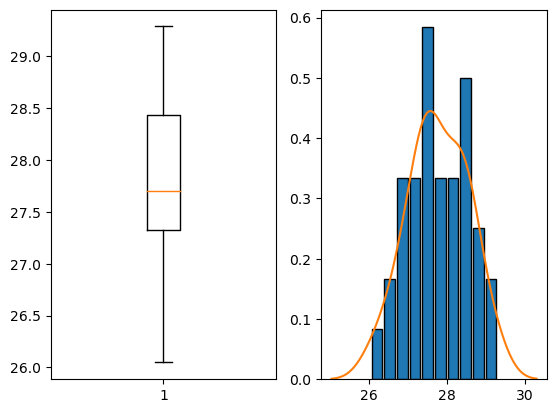

In [4]:
file = '../datasets/sampledata.txt'
data = np.genfromtxt(file)

plt.subplot(1,2,1) # boxplot
plt.boxplot(data) 
plt.subplot(1,2,2) # histogram
plt.hist(data, bins=10, rwidth=0.85, edgecolor = "k", density = 1.0)

# kernel density estimation
kde_obj = stats.gaussian_kde(data)
x_pts = np.linspace(min(data)-1, max(data)+1, 100)
estimated_pdf = kde_obj.evaluate(x_pts)
plt.plot(x_pts, estimated_pdf)

df = pd.DataFrame(data)
print(df.describe())

### **Define mapplot and read file**

In [5]:
def mapplot(data, levels, colorscheme, title):
    plt.figure(num=None, figsize=(4, 4), dpi=200, facecolor='w', edgecolor='k')
    m = bm(projection='cyl', llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution="l")
    m.drawcoastlines(linewidth=0.5)
    x, y = m(lonall, latall)
    jjj=m.contourf(x,y,data[:,:], extend = 'both', cmap=colorscheme, levels=levels)
    m.colorbar(jjj,location='bottom',size="8%",pad='25%')
    m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,weight='bold',linewidth=0.3)
    m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10,weight='bold', linewidth=0.3)
    plt.title(title,loc='left',fontsize=10,weight='bold')

file = "../datasets/era5_tas_1959_2021_25deg.nc"
f1 = nc.Dataset(file)
lon = f1.variables['lon'][:]
lat = f1.variables['lat'][:]
var = f1.variables['t2m'][:,:,:]
tas = np.average(var-273.15, axis=0)
lonall, latall = np.meshgrid(lon, lat)
parallels = np.arange(-90,90+1,30.) # make latitude lines
meridians = np.arange(-180,180,60.) # make longitude lines


### **Mean Temperature**

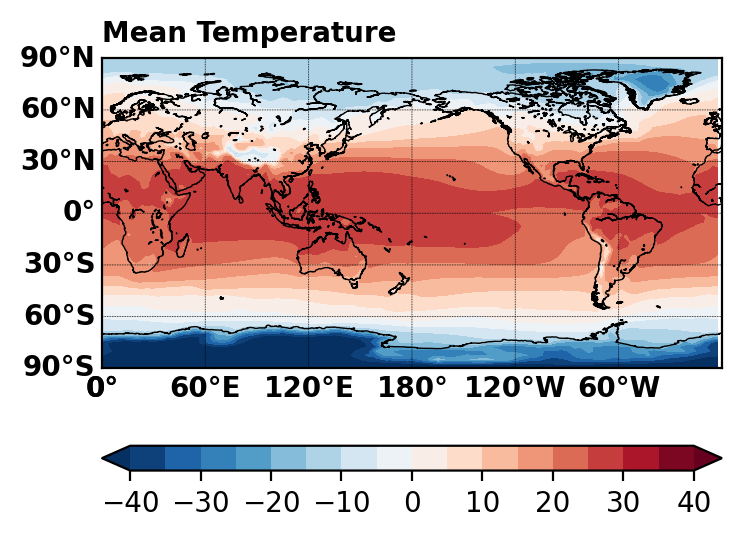

In [6]:
levels=[-40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40]
mapplot(tas, levels, plt.cm.RdBu_r, "Mean Temperature")

### **Standard Deviation**

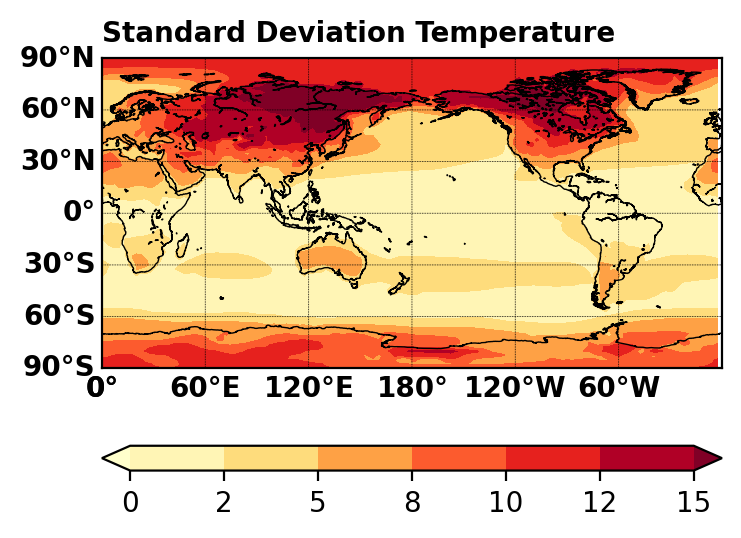

In [7]:
standardvar = np.std(var, axis=0)
levels=[0, 2, 5, 8, 10, 12, 15]
mapplot(standardvar, levels, plt.cm.YlOrRd, "Standard Deviation Temperature")

### **Variance Temperature**

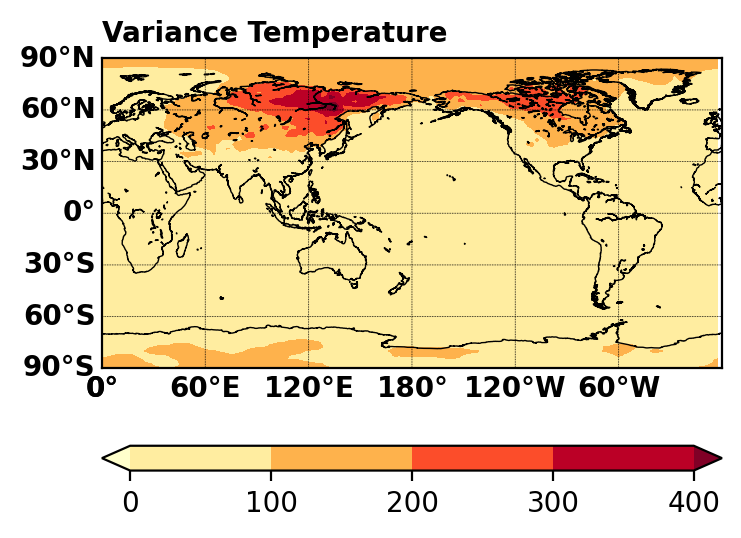

In [8]:
varvar = np.var(var, axis=0)
levels=[0, 100, 200, 300, 400]
mapplot(varvar, levels, plt.cm.YlOrRd, "Variance Temperature")
